<a href="https://colab.research.google.com/github/bijouvj/ST-summer-2024/blob/main/ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]

In [4]:
y = iris.target

In [5]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [6]:
X.shape

(150, 2)

In [7]:
# we now use a set of powerful library functions
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [18]:
X_train[:10]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3]])

In [9]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [10]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [11]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
sc.fit(X_train)

StandardScaler()

In [15]:
X_train_std = sc.transform(X_train)

In [16]:
# note that we are scaling X_test using scaler fit to only X_train
X_test_std = sc.transform(X_test)

In [17]:
X_test_std[:10]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821]])

In [19]:
sc.mean_

array([3.78952381, 1.19714286])

In [20]:
sc.var_

array([3.21484263, 0.58180136])

In [21]:
from sklearn.linear_model import Perceptron

In [22]:
ppn = Perceptron(eta0=0.1, random_state=1)

In [23]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [24]:
# the model is trained, so lets make predictions on test set
y_pred = ppn.predict(X_test_std)

In [27]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [29]:
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [32]:
ppn.intercept_

array([-1.00000000e-01, -2.77555756e-17, -4.00000000e-01])

In [33]:
np.dot(X_test_std[0], ppn.coef_[0]) + ppn.intercept_[0]

-0.36685009478552033

In [34]:
np.dot(X_test_std[1], ppn.coef_[1]) + ppn.intercept_[1]

0.013158059353653745

In [35]:
np.dot(X_test_std[2], ppn.coef_[2]) + ppn.intercept_[2]

-1.2329161584926842

In [37]:
y_pred[0], y_test[0]

(2, 2)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [38]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [39]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

In [40]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

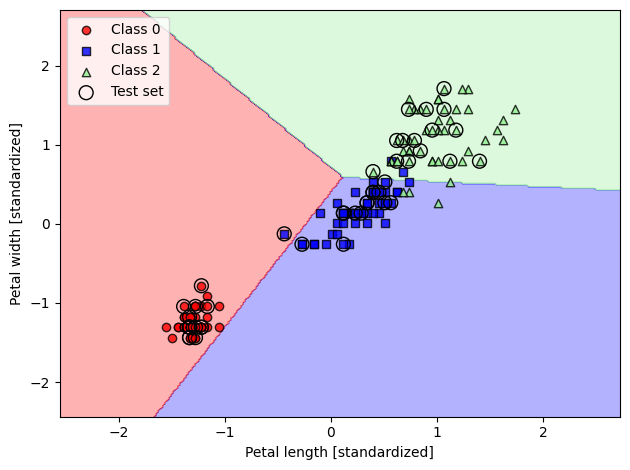

In [42]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic Regression

In [43]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [44]:
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

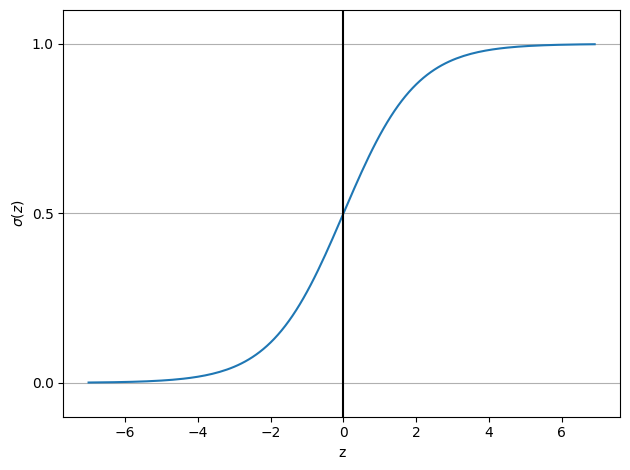

In [45]:
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [46]:
def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return - np.log(1 - sigmoid(z))

In [47]:
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
c0 = [loss_0(x) for x in z]

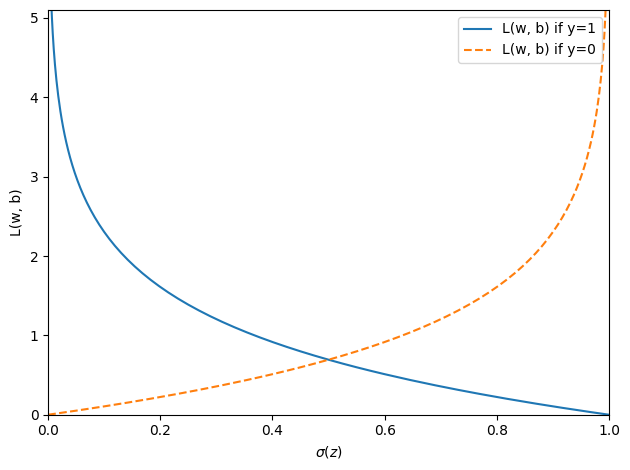

In [48]:
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [49]:
class LogisticRegressionGD:

    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------

    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------

    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the
          number of examples and n_features is the
          number of features.

        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                   - ((1 - y).dot(np.log(1 - output)))
                    / X.shape[0])
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [50]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [51]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

In [52]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

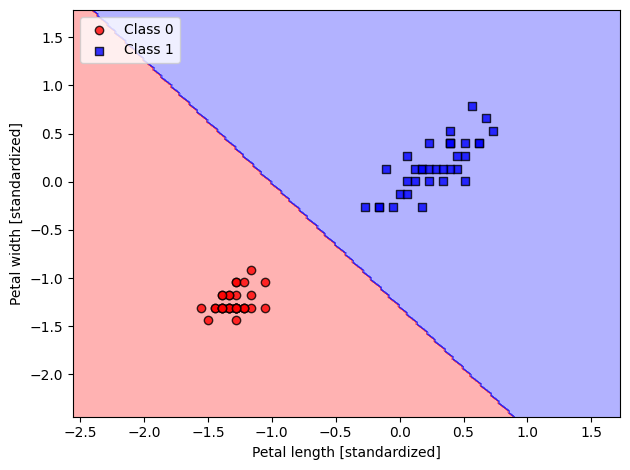

In [53]:
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(C=100.0, solver='lbfgs',
                        multi_class='ovr')

In [56]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr')

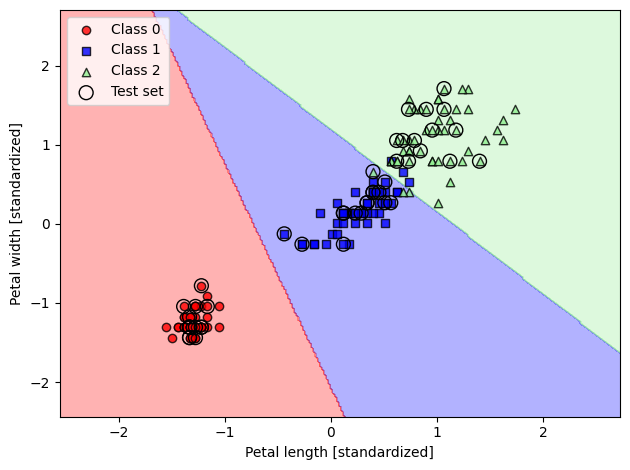

In [57]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()